# Download Requirements

In [ ]:
!pip install faiss-cpu

In [ ]:
# Install required dependencies
!pip install clarifai

  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.4.7 requires tqdm>=4.65.0, but you have tqdm 4.64.1 which is incompatible.


In [ ]:
!pip install PyMuPDF Pillow

In [ ]:
# !pip install sentence_transformers

In [ ]:
# !pip install faster_whisper
# !pip install elevenlabs
# !pip install ffmpeg-python

!pip install pypdf

!pip install PyPDF2

In [ ]:
# !pip install xformers
# !pip install langchain
# !pip install auto-gptq
# !pip install transformers
# !pip install bitsandbytes
# !pip install accelerate

In [ ]:
!pip install chromadb
!pip install lark

  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
clarifai 9.7.5 requires tqdm==4.64.1, but you have tqdm 4.66.1 which is incompatible.


In [ ]:
!pip install langchain

# Importing necessary libraries

In [ ]:
# from transformers import AutoTokenizer, pipeline, logging
# from auto_gptq import AutoGPTQForCausalLM, BaseQuantizeConfig
# import argparse

from langchain.llms import HuggingFacePipeline
from langchain.vectorstores import Chroma, FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.chains import ConversationalRetrievalChain, RetrievalQA, RetrievalQAWithSourcesChain
from langchain.memory import ConversationBufferMemory
import scipy

# from faster_whisper import WhisperModel

# from elevenlabs import generate, play, set_api_key
# from IPython.display import Audio
# from IPython.display import display
import os
# os.environ['elevenlabs_API_KEY'] = 'YOUR_elevenlabs_API_KEY'
# set_api_key(os.environ['elevenlabs_API_KEY'])

# Record Audio from Microphone

In [ ]:
# """
# To write this piece of code I took inspiration/code from a lot of places.
# It was late night, so I'm not sure how much I created or just copied o.O
# Here are some of the possible references:
# https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
# https://stackoverflow.com/a/18650249
# https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
# https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
# https://stackoverflow.com/a/49019356
# """
# from IPython.display import HTML, Audio
# from google.colab.output import eval_js
# from base64 import b64decode
# import numpy as np
# from scipy.io.wavfile import read as wav_read
# import io
# import ffmpeg

# AUDIO_HTML = """
# <script>
# var my_div = document.createElement("DIV");
# var my_p = document.createElement("P");
# var my_btn = document.createElement("BUTTON");
# var t = document.createTextNode("Press to start recording");

# my_btn.appendChild(t);
# //my_p.appendChild(my_btn);
# my_div.appendChild(my_btn);
# document.body.appendChild(my_div);

# var base64data = 0;
# var reader;
# var recorder, gumStream;
# var recordButton = my_btn;

# var handleSuccess = function(stream) {
#   gumStream = stream;
#   var options = {
#     //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
#     mimeType : 'audio/webm;codecs=opus'
#     //mimeType : 'audio/webm;codecs=pcm'
#   };
#   //recorder = new MediaRecorder(stream, options);
#   recorder = new MediaRecorder(stream);
#   recorder.ondataavailable = function(e) {
#     var url = URL.createObjectURL(e.data);
#     var preview = document.createElement('audio');
#     preview.controls = true;
#     preview.src = url;
#     document.body.appendChild(preview);

#     reader = new FileReader();
#     reader.readAsDataURL(e.data);
#     reader.onloadend = function() {
#       base64data = reader.result;
#       //console.log("Inside FileReader:" + base64data);
#     }
#   };
#   recorder.start();
#   };

# recordButton.innerText = "Recording... press to stop";

# navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


# function toggleRecording() {
#   if (recorder && recorder.state == "recording") {
#       recorder.stop();
#       gumStream.getAudioTracks()[0].stop();
#       recordButton.innerText = "Saving the recording... pls wait!"
#   }
# }

# // https://stackoverflow.com/a/951057
# function sleep(ms) {
#   return new Promise(resolve => setTimeout(resolve, ms));
# }

# var data = new Promise(resolve=>{
# //recordButton.addEventListener("click", toggleRecording);
# recordButton.onclick = ()=>{
# toggleRecording()

# sleep(2000).then(() => {
#   // wait 2000ms for the data to be available...
#   // ideally this should use something like await...
#   //console.log("Inside data:" + base64data)
#   resolve(base64data.toString())

# });

# }
# });

# </script>
# """

# def get_audio():
#   display(HTML(AUDIO_HTML))
#   data = eval_js("data")
#   binary = b64decode(data.split(',')[1])

#   process = (ffmpeg
#     .input('pipe:0')
#     .output('pipe:1', format='wav')
#     .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
#   )
#   output, err = process.communicate(input=binary)

#   riff_chunk_size = len(output) - 8
#   # Break up the chunk size into four bytes, held in b.
#   q = riff_chunk_size
#   b = []
#   for i in range(4):
#       q, r = divmod(q, 256)
#       b.append(r)

#   # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
#   riff = output[:4] + bytes(b) + output[8:]

#   sr, audio = wav_read(io.BytesIO(riff))

#   return audio, sr

# Models prepairation and Implementaion

In [ ]:
# use_triton = False

# model_name_or_path = "TheBloke/Llama-2-7b-Chat-GPTQ"
# model_basename = "model"

# tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

# model = AutoGPTQForCausalLM.from_quantized(model_name_or_path,
#         model_basename=model_basename,
#         use_safetensors=True,
#         trust_remote_code=True,
#         device="cuda:0",
#         use_triton=use_triton,
#         quantize_config=None)

# https://huggingface.co/TheBloke/OpenOrca-Platypus2-13B-GPTQ

# model_name_or_path = "TheBloke/OpenOrca-Platypus2-13B-GPTQ"

# tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

# model = AutoGPTQForCausalLM.from_quantized(model_name_or_path,
#         use_safetensors=True,
#         trust_remote_code=False,
#         device="cuda:0",
#         use_triton=use_triton,
#         quantize_config=None)


In [ ]:
# pipe = pipeline(
#     "text-generation",
#     model=model,
#     tokenizer=tokenizer,
#     max_length=2000,
#     # temperature=0,
#     top_p=0.95,
#     repetition_penalty=1.15
# )

# local_llm = HuggingFacePipeline(pipeline=pipe)

In [ ]:
# audio_transcribe_model = WhisperModel("medium")

In [ ]:
from langchain.llms import Clarifai
from langchain.vectorstores import Clarifai as Clarifai_vectordb

In [ ]:
# Please login and get your API key from  https://clarifai.com/settings/security
from getpass import getpass
#b39c822dc5554622896e5682a0eec108
CLARIFAI_PAT = getpass()

··········


In [ ]:
LLM_USER_ID = "meta"
LLM_APP_ID = "Llama-2"
LLM_MODEL_ID = 'llama2-70b-chat'#"GPT-3_5-turbo"

EMBED_USER_ID = "cohere"
EMBED_APP_ID = "embed"
EMBED_MODEL_ID = 'cohere-text-to-embeddings'#"GPT-3_5-turbo"

VECTORDB_USER_ID = "ab00k"
VECTORDB_APP_ID = "DocuChat"
VECTORDB_NUMBER_OF_DOCS = 1

# You can provide a specific model version as the model_version_id arg.
# MODEL_VERSION_ID = "MODEL_VERSION_ID"

In [ ]:
# Initialize a Clarifai LLM
clarifai_llm = Clarifai(
    pat=CLARIFAI_PAT, user_id=LLM_USER_ID, app_id=LLM_APP_ID, model_id=LLM_MODEL_ID
)

In [ ]:
from langchain.embeddings import ClarifaiEmbeddings
clarifai_embedding_model = ClarifaiEmbeddings(
    model_id=EMBED_MODEL_ID, pat=CLARIFAI_PAT, user_id=EMBED_USER_ID, app_id=EMBED_APP_ID
)

In [ ]:
# model_name = "intfloat/e5-large-v2"

# embedding_model = HuggingFaceEmbeddings(model_name=model_name)

# Implementing Different modules

In [ ]:
def create_db(pdfs):
    loader = PyPDFDirectoryLoader(pdfs)
    pages = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)

    docs = text_splitter.split_documents(pages)

    # persist_directory = 'db'

    # vector_db = Chroma.from_documents(documents=docs,
    #                                 embedding=clarifai_embedding_model,
    #                                 persist_directory=persist_directory)

    # texts = [docs[i].page_content for i in range(len(docs))]

    # metadatas = [docs[i].metadata for i in range(len(docs))]

    # vector_db = Clarifai_vectordb.from_texts(
    #     user_id=VECTORDB_USER_ID,
    #     app_id=VECTORDB_APP_ID,
    #     texts=texts,
    #     pat=CLARIFAI_PAT,
    #     number_of_docs=VECTORDB_NUMBER_OF_DOCS,
    #     metadatas=metadatas,
    # )

    # vector_db = Clarifai_vectordb.from_documents(
    #     user_id=VECTORDB_USER_ID,
    #     app_id=VECTORDB_APP_ID,
    #     documents=docs,
    #     pat=CLARIFAI_PAT,
    #     number_of_docs=VECTORDB_NUMBER_OF_DOCS,
    # )

    vector_db = FAISS.from_documents(docs, clarifai_embedding_model)

    return vector_db

In [ ]:
!mv /content/constitutionofpakistan.pdf /content/data

In [ ]:
import inspect

inspect.getsource(FAISS.from_documents)

'    @classmethod\n    def from_documents(\n        cls: Type[VST],\n        documents: List[Document],\n        embedding: Embeddings,\n        **kwargs: Any,\n    ) -> VST:\n        """Return VectorStore initialized from documents and embeddings."""\n        texts = [d.page_content for d in documents]\n        metadatas = [d.metadata for d in documents]\n        return cls.from_texts(texts, embedding, metadatas=metadatas, **kwargs)\n'

In [ ]:
    @classmethod
    def from_documents(
        cls: Type[VST],
        documents: List[Document],
        embedding: Embeddings,
        **kwargs: Any,
    ) -> VST:
        """Return VectorStore initialized from documents and embeddings."""
        texts = [d.page_content for d in documents]
        metadatas = [d.metadata for d in documents]
        return cls.from_texts(texts, embedding, metadatas=metadatas, **kwargs)


In [ ]:
# loader = PyPDFDirectoryLoader('/content/data')
# pages = loader.load()

# text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)

# docs = text_splitter.split_documents(pages)

In [ ]:
# docs[0].page_content

In [ ]:
# docs[0].metadata

In [ ]:
# len(docs)

In [ ]:
db = create_db('/content/data')

In [ ]:
# doc = db.similarity_search('macroinception breast cancer detection')

In [ ]:
# doc[0].page_content

In [ ]:
# doc[0].metadata

In [ ]:
# len(doc)

In [ ]:
# from langchain.retrievers.self_query.base import SelfQueryRetriever
# from langchain.chains.query_constructor.base import AttributeInfo
# from langchain.prompts import PromptTemplate
def create_chain(local_llm, vectordb):

    # memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

    # metadata_field_info = [
    # AttributeInfo(
    #     name="source",
    #     description="The neme of pdf",
    #     type="string or list[string]",
    # ),
    # AttributeInfo(
    #     name="page",
    #     description="The page no of the pdf",
    #     type="integer",
    # ),
    # ]

    # document_content_description = "Information about the PDF's page and name of pdf"
    # retriever = SelfQueryRetriever.from_llm(
    #     local_llm, vectordb, document_content_description, metadata_field_info, verbose=False,
    #     search_kwargs={"fetch_k": 3}
    # )

    # prompt_template = '''
    # Your name is Ash.
    # Use the following pieces of context to answer the users question and that
    # information consist of provided pdf details by user.
    # If you don't know the answer, just apologies and say that you couldn't
    # find relevent content to answer this question, don't try to
    # make anything from yourself just use the provided context.
    # And don't make any Follow-up Question and don't
    # provide any further or additional information just answer the question.
    # Always answer from the perspective of being Ash.
    # ----------------
    # {context}

    # Question: {question}
    # Helpful Answer:'''
    # PROMPT = PromptTemplate(
    #     template=prompt_template, input_variables=["context", "question"]
    # )

    # chain_type_kwargs = {"prompt": PROMPT}


    retriever = vectordb.as_retriever(search_type="mmr", search_kwargs={'fetch_k': 3})

    qa = RetrievalQA.from_chain_type(llm=local_llm,
                                     chain_type="stuff",
                                     retriever=retriever,
                                     return_source_documents=True,)
                                      #memory=memory
                                      # chain_type_kwargs=chain_type_kwargs)


    qa.combine_documents_chain.llm_chain.prompt.template = '''
    Your name is Ash.
    Use the following pieces of context to answer the users question and that
    information consist of provided pdf details by user.
    If you don't know the answer, just apologies and say that you couldn't
    find relevent content to answer this question, don't try to
    make anything from yourself just use the provided context. And always answer
    in conversationl freindly way. And don't make any Follow-up Question and don't
    provide any further information just answer the question.
    Always answer from the perspective of being Ash.
    ----------------
    {context}

    Question: {question}
    Helpful Answer:'''
    return qa, retriever

In [ ]:
qa, retriever = create_chain(clarifai_llm, db)

In [ ]:
chat_history = []
query = "what does the constitution of pakistan says about equal rights"
inputs = {
            'query': query,
            'chat_history': chat_history
        }
# chat_history.append((query, result['result']))

In [ ]:
result = qa(inputs, return_only_outputs=True)#qa.run(query)

In [ ]:
result['result']

'\n    According to the Constitution of Pakistan, all citizens are equal before the law and are entitled to equal protection of the law, as stated in Article 25(1). Additionally, the Constitution prohibits discrimination on the basis of sex, and provides for special provisions to be made for the protection of women and children.\n\nPlease note that the answer is based on the information provided in the given PDF and does not contain any personal opinions or beliefs.'

In [ ]:
import inspect

inspect.getsource(Clarifai_vectordb)

'class Clarifai(VectorStore):\n    """`Clarifai AI` vector store.\n\n    To use, you should have the ``clarifai`` python package installed.\n\n    Example:\n        .. code-block:: python\n\n                from langchain.vectorstores import Clarifai\n                from langchain.embeddings.openai import OpenAIEmbeddings\n\n                embeddings = OpenAIEmbeddings()\n                vectorstore = Clarifai("langchain_store", embeddings.embed_query)\n    """\n\n    def __init__(\n        self,\n        user_id: Optional[str] = None,\n        app_id: Optional[str] = None,\n        pat: Optional[str] = None,\n        number_of_docs: Optional[int] = None,\n        api_base: Optional[str] = None,\n    ) -> None:\n        """Initialize with Clarifai client.\n\n        Args:\n            user_id (Optional[str], optional): User ID. Defaults to None.\n            app_id (Optional[str], optional): App ID. Defaults to None.\n            pat (Optional[str], optional): Personal access token. 

In [ ]:
result.keys()

dict_keys(['result', 'source_documents'])

In [ ]:
[result['source_documents'][i].metadata for i in range(len())]

{'page': 0, 'source': '/content/data/AbdulBasitResume.pdf'}

In [ ]:
def remove_duplicate_dict(list_of_dict):
    unique_dictionaries = []
    seen = set()  # Keep track of seen dictionaries

    for d in list_of_dict:
        # Convert the dictionary to a frozenset to make it hashable
        frozen_d = frozenset(d.items())

        if frozen_d not in seen:
            seen.add(frozen_d)
            unique_dictionaries.append(d)

    return unique_dictionaries

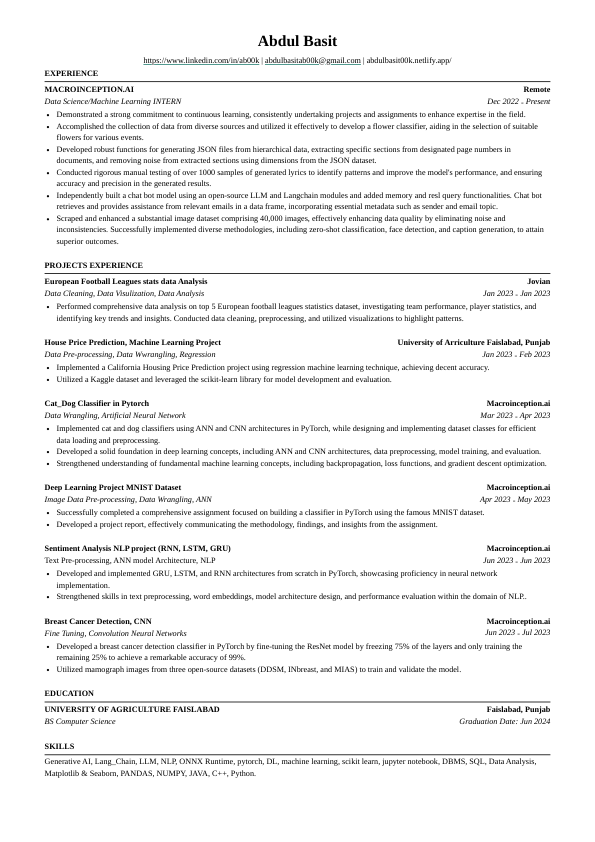

In [ ]:
import fitz  # PyMuPDF
from PIL import Image

def convert_pdf_page_to_pil_image(pdf_data):
    """
    Convert a specific page from a PDF to a PIL image.

    Args:
        pdf_data (dict): A dictionary containing 'page' (page number) and 'source' (PDF file path) keys.

    Returns:
        PIL.Image.Image: The converted image.
    """
    page_number = pdf_data.get('page', 0)
    pdf_source = pdf_data.get('source')

    if not pdf_source:
        raise ValueError("Source PDF file path is missing.")

    try:
        pdf_document = fitz.open(pdf_source)
        if 0 <= page_number < pdf_document.page_count:
            pdf_page = pdf_document[page_number]
            image = pdf_page.get_pixmap()
            pil_image = Image.frombytes("RGB", [image.width, image.height], image.samples)
            return pil_image
        else:
            raise ValueError("Invalid page number.")
    except Exception as e:
        print(f"Error: {e}")
        return None
    finally:
        if pdf_document:
            pdf_document.close()

# Example usage
pdf_data = {'page': 0, 'source': '/content/data/AbdulBasitResume.pdf'}
pil_image = convert_pdf_page_to_pil_image(pdf_data)
pil_image

In [ ]:
# result['source_documents'][0].page_content

'Abdul Basit\nhttps://www .linkedin.com/in/ab00k  | abdulbasitab00k@gmail.com  | abdulbasit00k.netlify .app/\nEXPERIENCE\nMACROINCEPTION.AI Remote\nData Science/Machine Learning INTERN  - Dec 2022 Present\nDemonstrated a strong commitment to continuous learning, consistently undertaking projects and assignments to enhance expertise in the field.\nAccomplished the collection of data from diverse sources and utilized it ef fectively to develop a flower classifier , aiding in the selection of suitable'

In [ ]:
# def record_audio():
#     audio, sr = get_audio()
#     scipy.io.wavfile.write('recording.wav', sr, audio)

In [ ]:
# def transcribe_audio():
#     text = None

#     segments, info = audio_transcribe_model.transcribe("/content/recording.wav")

#     for segment in segments:
#         text = segment.text

#     os.remove('/content/recording.wav')

#     return text


In [ ]:
# def play_audio(text):
#     audio = generate(
#         text=text,
#         voice="Bella",
#         model='eleven_multilingual_v1'
#     )

#     audio_clip = Audio(audio, autoplay=True)
#     display(audio_clip)